In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [14]:
f=pd.read_excel('D:/vsCode/2017Release_5.xlsx')

In [7]:
f.head()

,Column1,舉發單位,車號,違規車種,車籍車種,車籍簡式車種,人車雜湊,出生年,舉發類別,規責對象,...,違規日期,處罰機關代碼,舉發異常狀態,應繳金額,違規地點,裁決狀態,異動別,異議狀態,特殊註記,性別
0,0,0F91,wJ/hAYo8LQI2AcSc3dRXYVjRXvHCd25YX3DiOD6FIDM=,5.0,172.0,1.0,X3WAYHd9ah9qGMTqHbhrOyRrm8R09oxbD1eLeYjB9OA=,1995.0,1.0,1,...,2017-01-01 00:50:00,48,0,3500,國道五號南下４２公,A,B,NaN,NaN,F
1,1,0F91,YwxVNp0DaKGVBvg/I/0YoSYbljJ9+vRI9HV1yn+4BDI=,5.0,112.0,1.0,NaN,NaN,2.0,a,...,2017-01-01 00:59:00,58,0,3000,國道５號公路北向３,A,B,NaN,NaN,F
2,2,0F91,D2aYUbuBrDR4bj47tdbz1RdDBwFpaB46UlXknp2ZKUE=,5.0,172.0,1.0,/UMVx6IJW+Z64IdsWOrlDmPCBqymxSf9s2VJnV9iUOo=,1980.0,2.0,+,...,2017-01-01 01:00:00,48,0,5000,國道５號公路北向３,H,R,0.0,NaN,F
3,3,0F91,6PkA0kXMB1PRWS1AiRXchZwUKdTZcHvIk5BxbNAiL5o=,5.0,116.0,1.0,NaN,NaN,2.0,a,...,2017-01-01 01:06:00,48,0,3000,國道５號公路北向３,A,B,NaN,NaN,F
4,4,0F91,Iujfp7JBnob3yZAjr0KfL0spMu9EnCefbVWWl5WCh4A=,5.0,116.0,1.0,OWVnLVbTgDZVES0NmFBBvP4Pe+gh0DdMuDMXf9YvZfE=,1987.0,1.0,1,...,2017-01-01 01:10:00,58,0,3500,國道五號南下４２公,A,B,NaN,NaN,M


In [8]:
f.columns

Index(['Column1', '舉發單位', '車號', '違規車種', '車籍車種', '車籍簡式車種', '人車雜湊', '出生年',
       '舉發類別', '規責對象', '條款1', '條款2', '條款3', '條款4', '違規日期', '處罰機關代碼', '舉發異常狀態',
       '應繳金額', '違規地點', '裁決狀態', '異動別', '異議狀態', '特殊註記', '性別'],
      dtype='object')

In [75]:
f_birth=f.groupby('出生年').count()
# f_birth.head()
f_birth=f_birth[['車號']]
f_birth.head()

,車號
出生年,
1926.0,2
1929.0,1
1934.0,5
1935.0,1
1936.0,6


Text(0,0.5,'CarNumber')

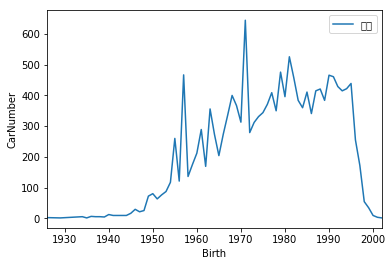

In [55]:
f_birth.plot()
plt.xlabel('Birth')
plt.ylabel('CarNumber')

In [20]:
sex=f.groupby('性別').count()
sex

,Column1,舉發單位,車號,違規車種,車籍車種,車籍簡式車種,人車雜湊,出生年,舉發類別,規責對象,...,條款4,違規日期,處罰機關代碼,舉發異常狀態,應繳金額,違規地點,裁決狀態,異動別,異議狀態,特殊註記
性別,,,,,,,,,,,,,,,,,,,,,
F,107597,107597,107597,107597,107378,107597,5109,2966,107594,107597,...,107597,107597,107597,107597,107597,107597,107597,107597,3499,2134
M,13542,13542,13542,13539,13364,13540,13542,12822,13502,13542,...,13542,13542,13542,13542,13542,13542,13542,13542,576,336


Text(0,0.5,'CarNumber')

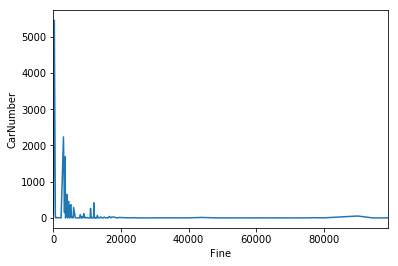

In [49]:
male=f[f['性別']=='M']
male_count=male.groupby('應繳金額').agg({'車號':'count'})
male_count.reset_index().set_index(['應繳金額'])['車號'].plot()
plt.xlabel('Fine')
plt.ylabel('CarNumber')

Text(0,0.5,'CarNumber')

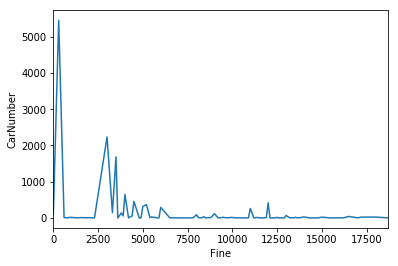

In [50]:
male_count.head(90).reset_index().set_index(['應繳金額'])['車號'].plot()
plt.xlabel('Fine')
plt.ylabel('CarNumber')

In [93]:
male.groupby(['條款1','條款2','條款3','條款4']).agg({'車號':'count'}).sort_values(by=['車號'],ascending=False)

,,,,車號
條款1,條款2,條款3,條款4,
2710009,0,0,0,3834
3310103,0,0,0,1929
2710009,8529902,0,0,1172
3120005,0,0,0,985
3120003,0,0,0,610
3310901,0,0,0,474
2710009,8519902,0,0,411
3310105,0,0,0,321
3311201,0,0,0,274


Text(0,0.5,'CarNumber')

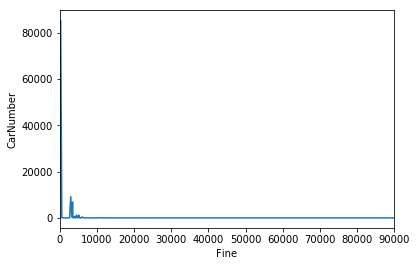

In [60]:
female=f[f['性別']=='F']
female_count=female.groupby('應繳金額').agg({'車號':'count'})
female_count.reset_index().set_index(['應繳金額'])['車號'].plot()
plt.xlabel('Fine')
plt.ylabel('CarNumber')

Text(0,0.5,'CarNumber')

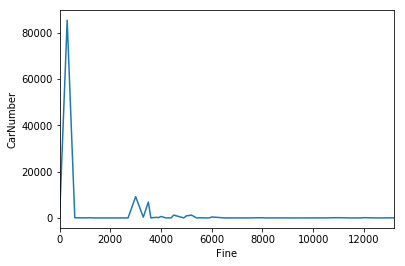

In [63]:
female_count.head(50).reset_index().set_index(['應繳金額'])['車號'].plot()
plt.xlabel('Fine')
plt.ylabel('CarNumber')

In [92]:
female.groupby(['條款1','條款2','條款3','條款4']).agg({'車號':'count'}).sort_values(by=['車號'],ascending=False)

,,,,車號
條款1,條款2,條款3,條款4,
2710009,0,0,0,84610
3310103,0,0,0,8278
3310101,0,0,0,4655
3310107,0,0,0,3114
3310105,0,0,0,1114
3310401,0,0,0,720
3310901,0,0,0,594
2710009,8529902,0,0,477
3311202,0,0,0,368


In [77]:
car_type=f.groupby(['車籍車種']).agg({'車號':'count'}).sort_values(by=['車號'],ascending=False)

In [80]:
car_type

,車號
車籍車種,
112.0,83080
116.0,17852
114.0,8764
212.0,2674
172.0,2636
202.0,1230
249.0,990
261.0,860
213.0,650


Text(0,0.5,'CarNumber')

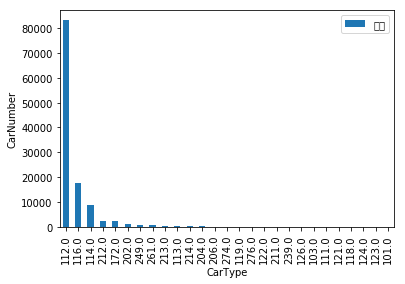

In [81]:
car_type.plot(kind='bar')
plt.xlabel('CarType')
plt.ylabel('CarNumber')

In [71]:
f.groupby(['出生年','性別','車籍車種']).agg({'車號':'count'}).sort_values(by=['車號'],ascending=False)

,,,車號
出生年,性別,車籍車種,
1981.0,M,112.0,358
1995.0,M,112.0,325
1993.0,M,112.0,320
1990.0,M,112.0,314
1957.0,M,212.0,305
1992.0,M,112.0,302
1991.0,M,112.0,285
1982.0,M,112.0,278
1968.0,M,112.0,272


In [72]:
male.groupby(['出生年','車籍車種']).agg({'車號': "count"}).sort_values(by=['車號'], ascending=False)

,,車號
出生年,車籍車種,
1981.0,112.0,358
1995.0,112.0,325
1993.0,112.0,320
1990.0,112.0,314
1957.0,212.0,305
1992.0,112.0,302
1991.0,112.0,285
1982.0,112.0,278
1968.0,112.0,272


In [73]:
female.groupby(['出生年','車籍車種']).agg({'車號': "count"}).sort_values(by=['車號'], ascending=False)

,,車號
出生年,車籍車種,
1963.0,112.0,190
1971.0,112.0,131
1984.0,112.0,103
1979.0,112.0,94
1985.0,112.0,93
1977.0,112.0,83
1975.0,112.0,69
1990.0,112.0,69
1980.0,112.0,65


In [91]:
label = 'Female','Male'
size = [sex.iloc[0]['車號'],sex.iloc[1]['車號']]

(-1.1002901814317545, 1.100013823919303, -1.1057799364721348, 1.10564502349629)

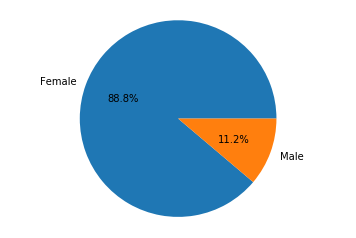

In [27]:
plt.pie(size,labels=label,autopct='%1.1f%%')
plt.axis('equal')

In [85]:
f.groupby('違規地點').agg({'車號':'count'}).sort_values(by=['車號'],ascending=False)

,車號
違規地點,
國道五號宜蘭（壯圍,23594
國道五號羅東－蘇澳,22476
國道五號頭城－宜蘭,19857
國道五號坪林行控專,14463
國道５號公路北向３,4697
國道五號宜蘭（四城,3104
國道五號南港系統（,2231
國道５號５．７公里,2136
國道五號石碇－坪林,2116
